### Predict Online Dating Matches
#### The Dataset provides a comprehensive view into the dynamics of online matchmaking interactions. It captures essential variables that influence the likelihood of successful matches across different genders. This dataset allows researchers and analysts to explore how factors such as VIP subscription status, income levels, parental status, age, and self-perceived attractiveness contribute to the outcomes of online dating endeavors.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/Online_Dating_Behavior_Dataset.csv')
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.51000,0.474000,50988.447000,0.978000,34.616000,5.624000,76.05000
std,0.50015,0.499573,9889.336141,0.997251,9.147799,2.824288,52.71315
min,0.00000,0.000000,20786.000000,0.000000,18.000000,1.000000,0.00000
25%,0.00000,0.000000,44358.500000,0.000000,27.000000,3.000000,0.00000
50%,1.00000,0.000000,50841.500000,1.000000,35.000000,6.000000,70.00000
75%,1.00000,1.000000,57396.000000,2.000000,43.000000,8.000000,120.00000
max,1.00000,1.000000,81931.000000,3.000000,49.000000,10.000000,160.00000


#### Gender: 0 (Male), 1 (Female)
#### PurchasedVIP: 0 (No), 1 (Yes)
#### Income: Annual income in USD
#### Children: Number of children
#### Age: Age of the user
#### Attractiveness: Subjective rating of attractiveness (1-10)
#### Matches: Number of matches obtained based on criteria
### Target Variable:
#### Matches: Number of matches received, indicative of success rate in online dating

In [32]:
df.columns = df.columns.str.lower()

In [33]:
df.columns

Index(['gender', 'purchasedvip', 'income', 'children', 'age', 'attractiveness',
       'matches'],
      dtype='object')

<Axes: xlabel='gender', ylabel='count'>

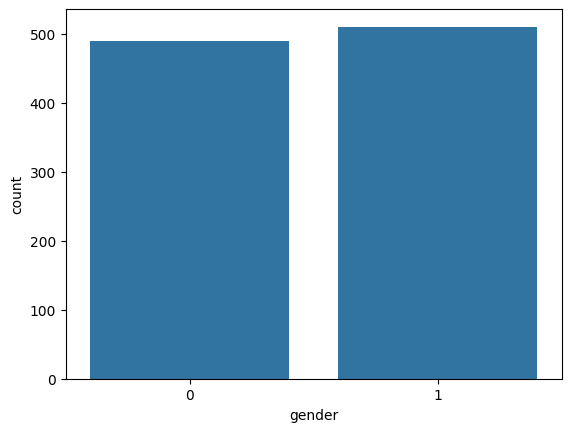

In [34]:
sns.countplot(x=df.gender)

<Axes: xlabel='purchasedvip', ylabel='count'>

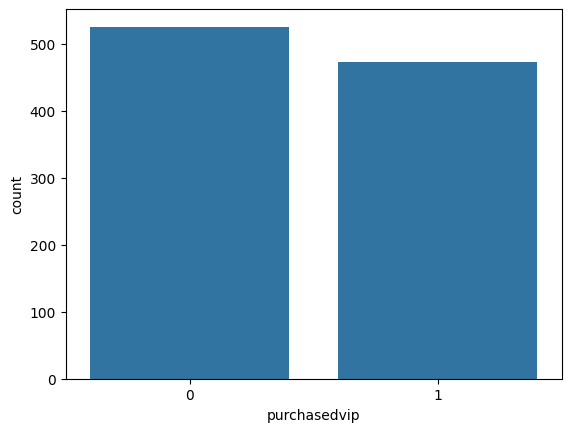

In [35]:
sns.countplot(x=df.purchasedvip)

<Axes: xlabel='income', ylabel='Count'>

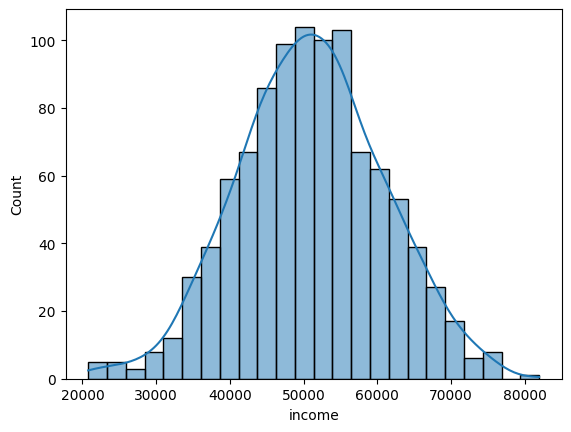

In [36]:
sns.histplot(x=df.income,kde=True)

<Axes: xlabel='income'>

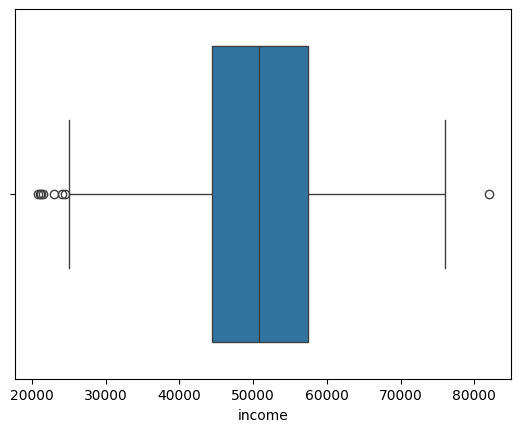

In [37]:
sns.boxplot(x=df.income)

In [38]:
df.children.value_counts()

children
0    412
1    294
2    198
3     96
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

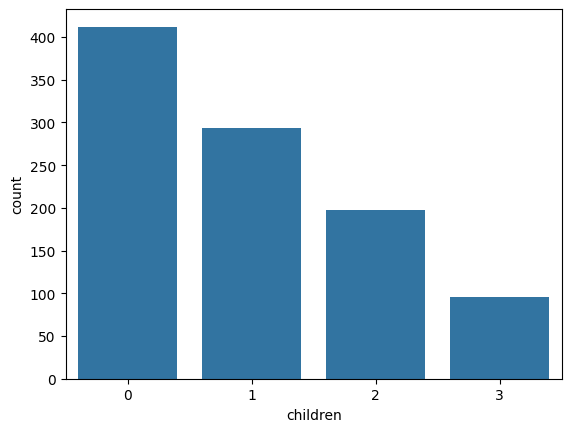

In [39]:
sns.countplot(x=df.children)

<Axes: xlabel='age', ylabel='Count'>

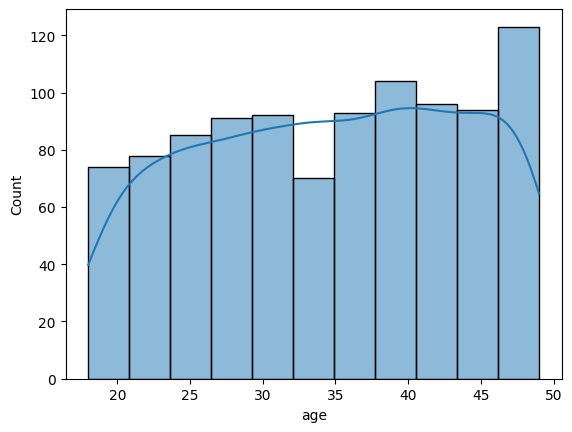

In [40]:
sns.histplot(x=df.age,kde=True)

<Axes: xlabel='age'>

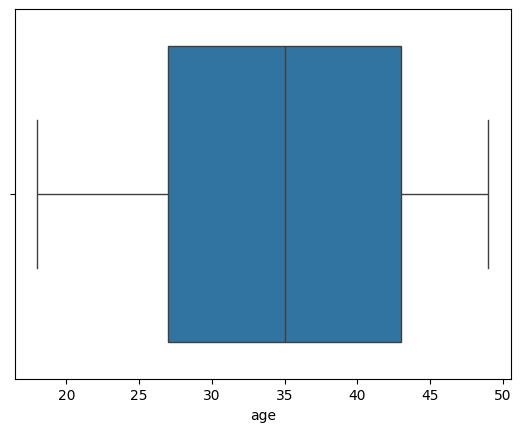

In [41]:
sns.boxplot(x=df.age)

<Axes: xlabel='matches', ylabel='Count'>

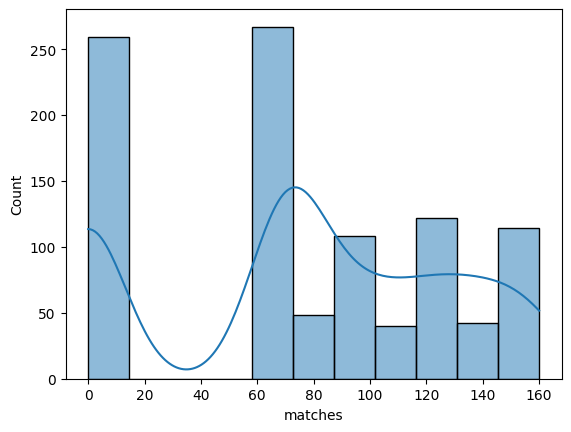

In [42]:
sns.histplot(x=df.matches,kde=True)

#### Removing outliers

In [43]:
upper_bound = df.income.mean() + (2*df.income.std())
lower_bound = df.income.mean() - (2*df.income.std())
df = df[(df.income < upper_bound) & (df.income > lower_bound)]

In [44]:
df.shape

(956, 7)

In [45]:
df.head()

,gender,purchasedvip,income,children,age,attractiveness,matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
columns = ['gender','purchasedvip','income','children','attractiveness']
scaler = StandardScaler()
scale_pipe = Pipeline(steps=[
    ('scaler',StandardScaler())
])
preprocessor = ColumnTransformer([
    ('scale_pipe',scale_pipe,columns)
])

In [48]:
X = df.drop('matches',axis=1)
y = df.matches
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [49]:
models = {
    'Linear Regression':LinearRegression(),
    'KNeighbours':KNeighborsRegressor(),
    'Cat Boost':CatBoostRegressor(),
    'XGB':XGBRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),  
}

In [50]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = r2_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with score of {best_score}")

Learning rate set to 0.038846
0:	learn: 50.5486543	total: 2.53ms	remaining: 2.53s
1:	learn: 48.9096525	total: 4.35ms	remaining: 2.17s
2:	learn: 47.1562751	total: 6.34ms	remaining: 2.11s
3:	learn: 45.5127487	total: 8.11ms	remaining: 2.02s
4:	learn: 43.9369287	total: 9.59ms	remaining: 1.91s
5:	learn: 42.4643854	total: 11.4ms	remaining: 1.89s
6:	learn: 41.1329744	total: 13.1ms	remaining: 1.86s
7:	learn: 39.7466499	total: 14.9ms	remaining: 1.84s
8:	learn: 38.3647610	total: 16.7ms	remaining: 1.84s
9:	learn: 37.0522049	total: 17.9ms	remaining: 1.78s
10:	learn: 35.7909807	total: 19.8ms	remaining: 1.78s
11:	learn: 34.5304165	total: 22.6ms	remaining: 1.86s
12:	learn: 33.3266386	total: 24.5ms	remaining: 1.86s
13:	learn: 32.1336334	total: 25.4ms	remaining: 1.79s
14:	learn: 31.0139008	total: 27.8ms	remaining: 1.83s
15:	learn: 30.0785662	total: 29.1ms	remaining: 1.79s
16:	learn: 29.0547505	total: 30.8ms	remaining: 1.78s
17:	learn: 28.0234019	total: 31.9ms	remaining: 1.74s
18:	learn: 27.0399603	tota

In [51]:
df.head()

,gender,purchasedvip,income,children,age,attractiveness,matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [52]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_data.csv',index=False)